# Canadian Immigration Analysis

Author: Sebastian de Leon

Course Project, UC Irvine, Math 10, S22

# Introduction

In this project, I will be analyzing a Kaggle dataset focused on immigration to Canada from 1980-2013. I will use the immigration data to both try my hand at classification and regression through random forests and decision trees using scikit-learn. I will also use Seaborn to try and obtain a visualization of the data that is different from Altair.

# Main portion of the project


In [ ]:
import pandas as pd
import numpy as np
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, mean_squared_error, mean_absolute_error

In [ ]:
df = pd.read_csv("canadian_immigration_data.csv")
df

Country Continent              Region             DevName  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  \
0      39    39    47    71   340  ...  3436  3009  2652  2111  1746  1758   
1       0     0     0     0     0  ...  1223   856   702   560   716   561   
2      67    71    69    63    44  ...  3626  4807  3623  4005  5393  4752   
3       1     0     0     0     0  ...     0     1     0     0     0     0   
4       0     0     0     0     0  ...     0     1     1     0     0     0   
..    ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   ...   
190  1829  2162  3404  7583  5907  ...  1852  3153  2574  1784  2171  1942   
191     0     0     0     0     0  ...     0     1     0     0     0     0   
192     2     1     6     0    18  ...   161   140   122   133   128   211   
193    17    11     7    16     9  ...    91    77    71    64    60   102   
194   114   102    44    32    29  ...   615   454   663   611   508   494   

     2011  2012  2013  Total  
0    2203  2635  2004  58639  
1     539   620   603  15699  
2    4325  3774  4331  69439  
3       0     0     0      6  
4       0     1     1     15  
..    ...   ...   ...    ...  
190  1723  1731  2112  97146  
191     0     0     0      2  
192   160   174   217   2985  
193    69    46    59   1677  
194   434   437   407   8598  

[195 rows x 39 columns]

In [ ]:
df.isna().any().any()

False

In [ ]:
df.Region.unique()

array(['Southern Asia', 'Southern Europe', 'Northern Africa', 'Polynesia',
       'Middle Africa', 'Caribbean', 'South America', 'Western Asia',
       'Australia and New Zealand', 'Western Europe', 'Eastern Europe',
       'Central America', 'Western Africa', 'Southern Africa',
       'South-Eastern Asia', 'Eastern Africa', 'Northern America',
       'Eastern Asia', 'Northern Europe', 'Melanesia', 'Central Asia',
       'Micronesia'], dtype=object)

Let us create a few sub-dataframes for later use.

In [ ]:
reg_group = df.groupby("Region")
df_w_africa = reg_group.get_group("Western Africa").copy()
df_e_asia = reg_group.get_group("Eastern Asia").copy()
df_caribbean = reg_group.get_group("Caribbean").copy()

## Initial Data Visualization
Now, we are going to visualize the data of the dataframe by continent by using the "Total" column. I will use both Altair and Seaborn to compare the visualizations.

First, let us use Altair to visualize the data.

In [ ]:
c_cont_alt = alt.Chart(data = df).mark_circle(clip = True).encode(
    x = alt.X("Total", scale = alt.Scale(domain = (0, 150000))),
    y = "Continent",
    tooltip = ["Country"]
)
c_cont_alt

alt.Chart(...)

What we see here is that data in Altair is visualized in a line in categorical settings. I have cut off the highest values for more visibility. Now, let's use Seaborn to see how its visualization differs.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 18.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


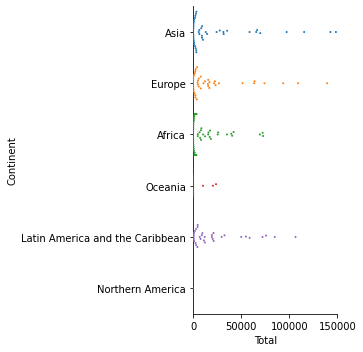

In [ ]:
c_cont_sns = sns.catplot(x = "Total", y = "Continent", kind = "swarm", s = 2, data = df)
c_cont_sns.set(xlim = (0, 150000))

Here, it can be seen that Seaborn can portray the shape of the data when it is in a scatterplot as well as its density. I have also cut out the highest values here.

## Random Forest Classification

Now, we should try to predict the development status using a ```RandomForestClassifier``` object.

In [ ]:
rfe = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = 10)

In [ ]:
numcols = [c for c in df.columns[4:] if c != "Total"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[numcols], df["DevName"], train_size = 0.8, random_state = 1)

In [ ]:
rfe.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=10, n_estimators=1000)

Since we have fit the random forest classifier, we should now calculate the score of the training and test sets in order to check the accuracy of the object.

In [ ]:
rfe.score(X_train, y_train)

0.9166666666666666

In [ ]:
rfe.score(X_test, y_test)

0.8974358974358975

Here, we can see that the score for the training set and the test set are within 5 percent. Therefore, the random forest classifier is fairly accurate, with little overfitting. Let us compare this to a regular ```DecisionTreeClassifier``` in order to see how much more accurate the random forest is at classification.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 10)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10)

In [ ]:
clf.score(X_train, y_train)

0.9294871794871795

In [ ]:
clf.score(X_test, y_test)

0.8205128205128205

Through calculating the scores of the decision tree classifier, we can find that it is actually slightly less accurate than the random forest classifier, and is a little bit overfit, as the difference of the scores between the test set and the training set is slightly over 5 percent. I will make a decision tree diagram to see if the decision tree classifier actually used its full depth.

In [ ]:
fig = plt.figure(figsize = (200, 100))
_ = plot_tree(
    clf,
    feature_names = clf.feature_names_in_,
    class_names = clf.classes_,
    filled = True
)

This ```plot_tree``` illustrates that ```clf``` goes through a depth of 5 rather than its max of 7. This is because of the number of max leaf nodes. From this, we can assume that ```rfe``` will also use a depth of 5 in its calculations. Next, let's calculate the log loss of the random forest classifier at different numbers of leaf nodes.

In [ ]:
train_error_dict_rfe = {}
test_error_dict_rfe = {}
for n in range(5, 56):
    rfe_temp = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = n)
    rfe_temp.fit(X_train, y_train)
    train_error_dict_rfe[n] = log_loss(y_train, rfe_temp.predict_proba(X_train), labels = ["Developed regions", "Developing regions"])
    test_error_dict_rfe[n] = log_loss(y_test, rfe_temp.predict_proba(X_test), labels = ["Developed regions", "Developing regions"])

In [ ]:
df_train_rfe = pd.DataFrame({"y":train_error_dict_rfe, "type":"train"})
df_test_rfe = pd.DataFrame({"y":test_error_dict_rfe, "type": "test"})

In [ ]:
df_compare = pd.concat([df_train_rfe, df_test_rfe]).reset_index()

In [ ]:
alt.Chart(data = df_compare).mark_line().encode(
    x = "index:O",
    y = "y",
    color = "type"
)

alt.Chart(...)

This chart is certainly a bit weird. Let's make a similar one with the decision tree classifier for comparison.

In [ ]:
train_error_dict_clf = {}
test_error_dict_clf = {}
for n in range(5, 56):
    clf_temp = DecisionTreeClassifier(max_depth = 30, max_leaf_nodes = n)
    clf_temp.fit(X_train, y_train)
    train_error_dict_clf[n] = log_loss(y_train, clf_temp.predict_proba(X_train), labels = ["Developed regions", "Developing regions"])
    test_error_dict_clf[n] = log_loss(y_test, clf_temp.predict_proba(X_test), labels = ["Developed regions", "Developing regions"])

In [ ]:
df_train_clf = pd.DataFrame({"y":train_error_dict_clf, "type":"train"})
df_test_clf = pd.DataFrame({"y":test_error_dict_clf, "type": "test"})

In [ ]:
df_compare2 = pd.concat([df_train_clf, df_test_clf]).reset_index()

In [ ]:
alt.Chart(data = df_compare2).mark_line().encode(
    x = "index:O",
    y = "y",
    color = "type"
)

alt.Chart(...)

We can see that the chart for the random forest indicates that the model stops improving once the max number of leaf nodes reaches the mid teens or so. Contrarily, the chart for the decision tree show that the model reaches an optimal number of leaf nodes very early on, and then the test error increases astronomically. Therefore, it seems like random forest classification is a good way to get a more accurate classification prediction. It should be noted that some of the strangeness in the graphs comes from the randomness of the decision trees.

## Decision Tree Regression

Next, I will try to see if I can predict immigration values using decision tree regression. However, before that, I want to use Seaborn to visualize the trends of the data in specific regions.

In [ ]:
df_e_asia_t = df_e_asia \
    .drop(['Continent', 'Region', 'DevName', 'Total'], axis = 1) \
    .melt('Country', var_name = 'Year', value_name = 'Count') \
    .astype({'Year': int, 'Count': int})

In [ ]:
df_w_africa_t = df_w_africa \
    .drop(['Continent', 'Region', 'DevName', 'Total'], axis = 1) \
    .melt('Country', var_name = 'Year', value_name = 'Count') \
    .astype({'Year': int, 'Count': int})

In [ ]:
df_caribbean_t = df_caribbean \
    .drop(['Continent', 'Region', 'DevName', 'Total'], axis = 1) \
    .melt('Country', var_name = 'Year', value_name = 'Count') \
    .astype({'Year': int, 'Count': int})

In [ ]:
# An example of the reformed dataframe
df_e_asia_t.head()

Country  Year  Count
0                                           China  1980   5123
1  China, Hong Kong Special Administrative Region  1980      0
2      China, Macao Special Administrative Region  1980      0
3           Democratic People's Republic of Korea  1980      1
4                                           Japan  1980    701

In these instances of code, the ```.drop``` section removes the columns located within the method, the ```.melt``` section takes the dataframe and adds in a year column based on the "1980" through "2013" columns, along with duplicating the rows for each instance of a country and assigning the correct number of immigrants for each corresponding year, and the ```.astype``` section makes sure the type of the data in the "Year" and "Count" columns are integers.

<AxesSubplot:xlabel='Year', ylabel='Count'>

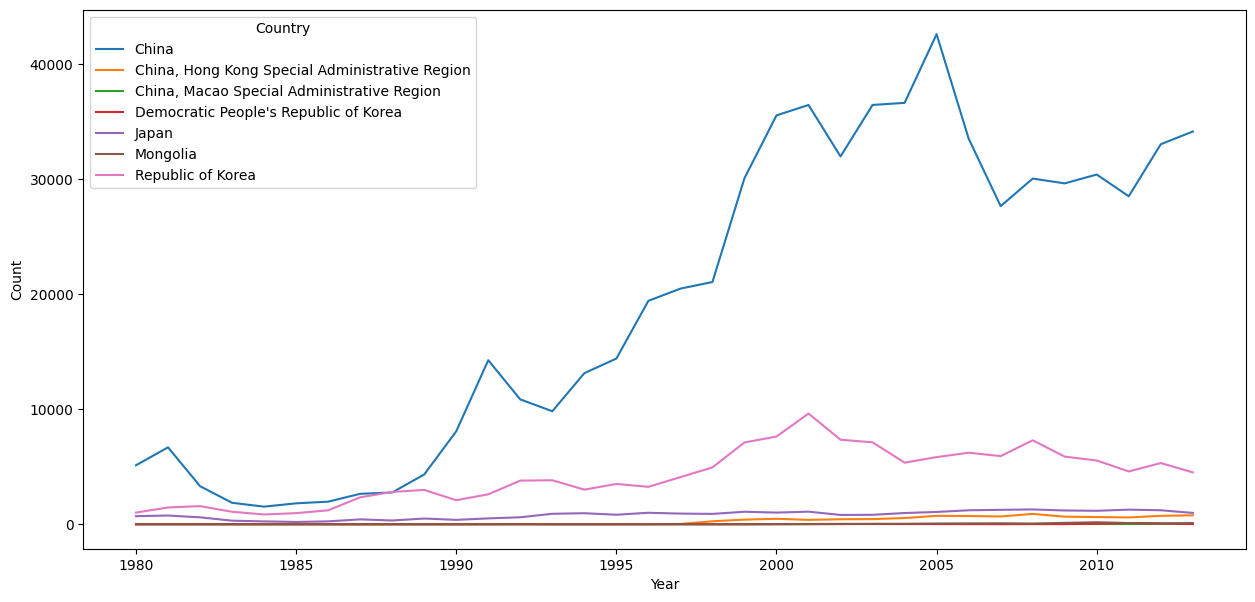

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sns.lineplot(data = df_e_asia_t, x = "Year", y = "Count", hue = "Country")

<AxesSubplot:xlabel='Year', ylabel='Count'>

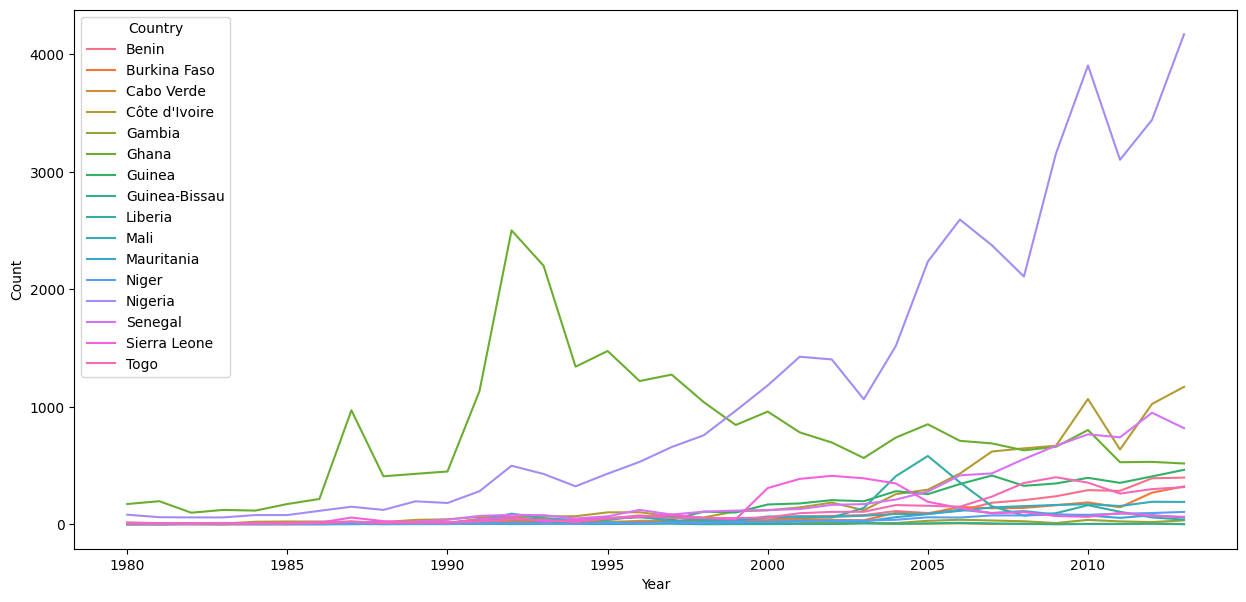

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sns.lineplot(data = df_w_africa_t, x = "Year", y = "Count", hue = "Country")

<AxesSubplot:xlabel='Year', ylabel='Count'>

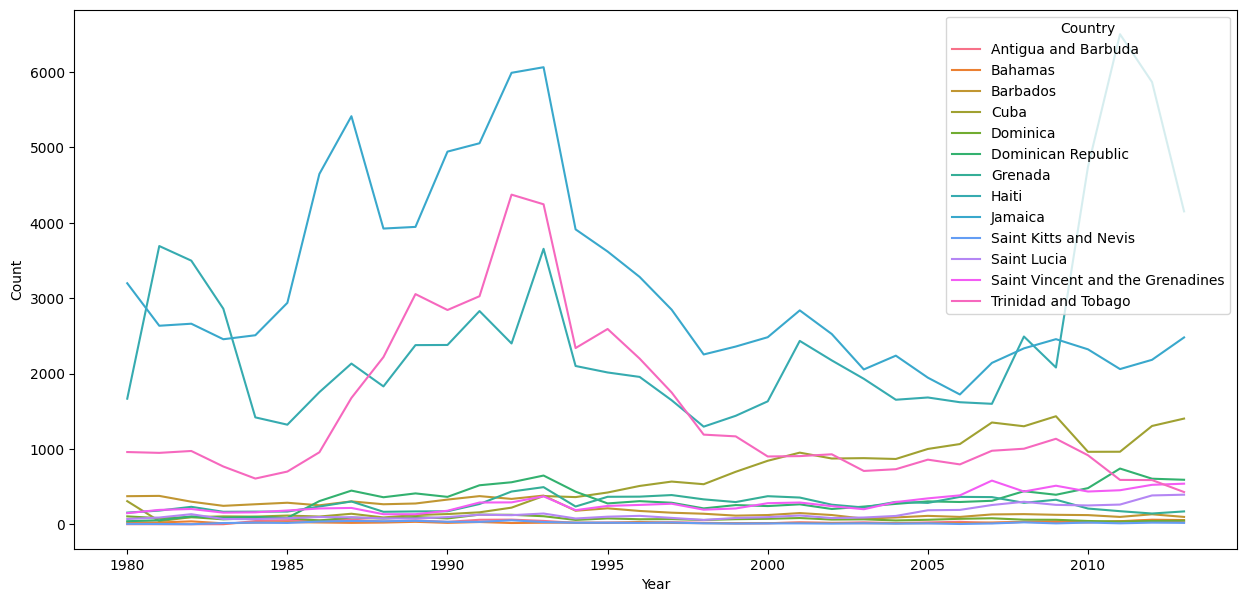

In [ ]:
fig, ax = plt.subplots(figsize = (15,7))
sns.lineplot(data = df_caribbean_t, x = "Year", y = "Count", hue = "Country")

This technique for reforming and visualizing the data can be found at the Kaggle tutorial [Refugee Crises, World Conflicts, and Immigration](https://www.kaggle.com/code/rayhanlahdji/refugee-crises-world-conflicts-and-immigration). From this visualization, we can see that the most immigrants to Canada have been coming from China, but there has been more consistent immigration from the Caribbean region, and that immigration from West Africa has increased in recent years.

Now, I want to perform regression on these sub-dataframes. I will use the years 1980-2000 with the ```DecisionTreeRegressor``` to predict the number on immigrants in the year 2001. I don't expect it to be perfect, and I especially don't expect to see similar results for each dataframe. I'm going to use the entire dataframe as a training set, as each regional group only has very few countries anyway.

In [ ]:
numcols_19 = numcols[:21]

In [ ]:
def get_errors_squared(frame):
    reg_temp = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 20, criterion = "squared_error")
    reg_temp.fit(df[numcols_19], df["2001"])
    return (mean_squared_error(reg_temp.predict(df[numcols_19]), df["2001"]), mean_squared_error(reg_temp.predict(frame[numcols_19]), frame["2001"]))

In [ ]:
get_errors_squared(df_e_asia)

(15330.73683853351, 2369.9041282128055)

In [ ]:
get_errors_squared(df_w_africa)

(15330.73683853351, 6717.444781691974)

In [ ]:
get_errors_squared(df_caribbean)

(15330.73683853351, 18446.617360503245)

In [ ]:
def get_errors_absolute(frame):
    reg_temp = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 20, criterion = "absolute_error")
    reg_temp.fit(df[numcols_19], df["2001"])
    return (mean_absolute_error(reg_temp.predict(df[numcols_19]), df["2001"]), mean_absolute_error(reg_temp.predict(frame[numcols_19]), frame["2001"]))

In [ ]:
get_errors_absolute(df_e_asia)

(67.56410256410257, 20.142857142857142)

In [ ]:
get_errors_absolute(df_w_africa)

(67.56410256410257, 59.1875)

In [ ]:
get_errors_absolute(df_caribbean)

(67.56410256410257, 34.07692307692308)

From seeing the results of each function for each sub-dataframe, we can observe that the Caribbean sub-dataframe is said to have the least accurate prediction when using mean squared error, and the West Africa sub-dataframe is said to have the least accurate prediction when using mean absolute error. Either way, the predictions seem to be fairly accurate especially considering that most of the sub-dataframes have a lower error than the entire dataframe.

Let's graph out the feature importances now, using Altair and Seaborn.

In [ ]:
reg = DecisionTreeRegressor(max_depth = 5, max_leaf_nodes = 20, criterion = "absolute_error", random_state = 1)

In [ ]:
reg.fit(df[numcols_19], df["2001"])

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      max_leaf_nodes=20, random_state=1)

In [ ]:
df_features = pd.DataFrame({"Features":reg.feature_names_in_, "Importances":reg.feature_importances_})

In [ ]:
alt.Chart(data = df_features).mark_bar().encode(
    x = "Features",
    y = "Importances"
)

alt.Chart(...)

<AxesSubplot:xlabel='Features', ylabel='Importances'>

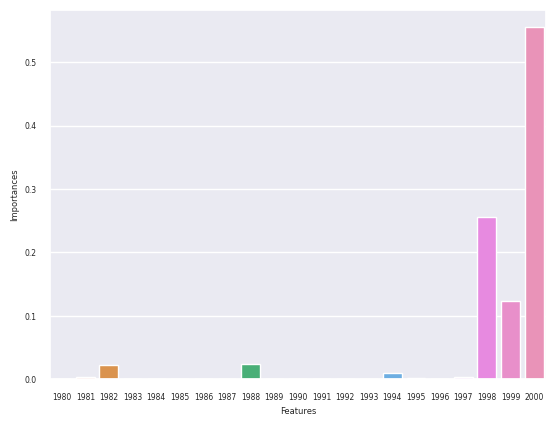

In [ ]:
sns.set(font_scale = 0.5)
sns.barplot(x = "Features", y = "Importances", data = df_features)

We can tell from these bar charts that the enntirety of the prediction for the year 2001 comes from the data for the years 2000, 1999, 1998, 1997, 1995, 1994, 1988, and 1982. Therefore, we can tell that most of the importance in predicting the data is placed in the immediately previous years. We can also tell that Seaborn is not as good at displaying the bar graphs, as it misses the minimal 1995 and 1997 columns. Let's now predict for each region and compare the prediction to the real data.

In [ ]:
df_e_asia["2001 Pred"] = reg.predict(df_e_asia[numcols_19])
df_e_asia["2001 Diff"] = df_e_asia["2001"]-df_e_asia["2001 Pred"]

In [ ]:
df_w_africa["2001 Pred"] = reg.predict(df_w_africa[numcols_19])
df_w_africa["2001 Diff"] = df_w_africa["2001"]-df_w_africa["2001 Pred"]

In [ ]:
df_caribbean["2001 Pred"] = reg.predict(df_caribbean[numcols_19])
df_caribbean["2001 Diff"] = df_caribbean["2001"]-df_caribbean["2001 Pred"]

In [ ]:
def get_alt_chart(frame):
    c_reg_alt = alt.Chart(data = frame).mark_bar().encode(
        x = "Country",
        y = "2001 Diff",
        color = "Country",
        tooltip = ["Country", "2001", "2001 Pred", "2001 Diff"]
    )
    return c_reg_alt

In [ ]:
def get_sns_chart(frame):
    c_reg_sns = sns.barplot(x = "Country", y = "2001 Diff", data = frame)
    plt.xticks(rotation = 45, ha = "right")
    return c_reg_sns

We have to graph each chart separately because they are using two different plotting systems.

In [ ]:
get_alt_chart(df_e_asia)

alt.Chart(...)

<AxesSubplot:xlabel='Country', ylabel='2001 Diff'>

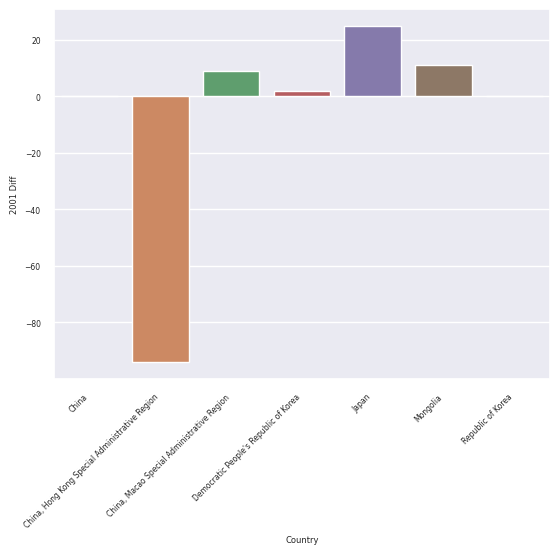

In [ ]:
get_sns_chart(df_e_asia)

In [ ]:
get_alt_chart(df_w_africa)

alt.Chart(...)

<AxesSubplot:xlabel='Country', ylabel='2001 Diff'>

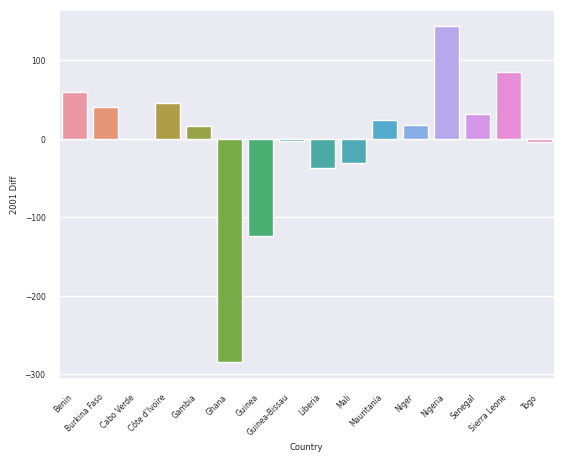

In [ ]:
get_sns_chart(df_w_africa)

In [ ]:
get_alt_chart(df_caribbean)

alt.Chart(...)

<AxesSubplot:xlabel='Country', ylabel='2001 Diff'>

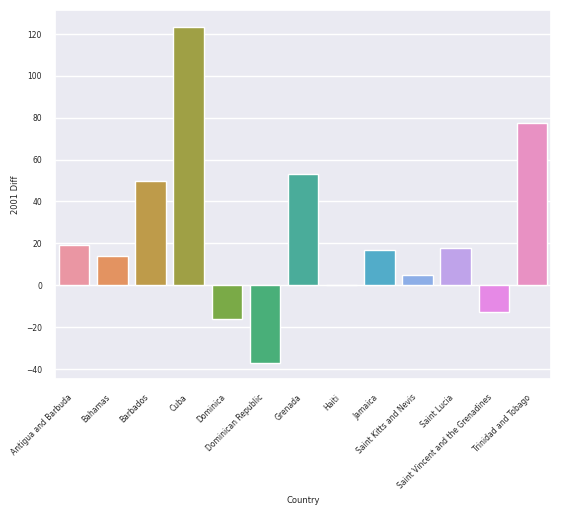

In [ ]:
get_sns_chart(df_caribbean)

In terms of the charts, it can be observed that it is easier to get extra information in the Altair charts, like tooltips. The Seaborn charts can be quite finicky with text too, which makes them more difficult to work with. However, the Seaborn charts are automatically color-coded and bigger than the Altair charts, which can be advantageous in some situations.

From these charts, we can tell that the decision tree regressor had the most trouble predicting the outcome for 2001 for the West Africa region, as the absolute value of the difference between the prediction and the actual value was the highest on average, and it was best at predicting for the East Asia region, as it had the lowest absolute values of the differences on average. Furthermore, most of these predictions were fairly close to the real amount, so it seems the decision tree regressor is doing pretty well at getting the general range of the predictions.

# Summary

There are multiple conclusions to be drawn from this analysis. First of all, it may be pertinent to visualize data using Seaborn instead of Altair if it is desired to have a nicer-looking graph or if it is desired to more accurately portray density of data. otherwise, Altair is an easier graphing program that is able to convey more information more easily. Second, it is important to note that random forest classification may be generally more accurate than decision tree classification for classification within the same data set. As can be seen from the log-loss charts, the random forest classifier generally has a lower average log-loss than the decision tree classifier for the test sets/ However, it is important to consider that there is variability within these models, and thus the results of either classification could be different when done with a different random state. Lastly, it can be seen that decision tree classifiers work relatively well for predicting immigration data, as neither the absolute error nor difference between the real and predicted values were all to high on average. However, caution must be taken with this conclusion, as the year used for prediction did not experience many abnormal spikes or dips in the data for the regions tested. This could be different in a more abnormal year.

# References

* What is the source of your dataset(s)?
[Immigration to Canada](https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada)

* Were any portions of the code or ideas taken from another source?  List those sources here and say how they were used.
[Immigration to Canada from 1980-2013](https://www.kaggle.com/code/jcforest/immigration-to-canada-from-1980-2013): Inspiration for potential visualizations

[Refugee Crises, World Conflicts, and Immigration](https://www.kaggle.com/code/rayhanlahdji/refugee-crises-world-conflicts-and-immigration): Source for dataframe alterations and Seaborn line plot tutorials

[Predict Migration with Machine Learning](https://thecleverprogrammer.com/2020/09/08/predict-migration-with-machine-learning/): Inspiration for migration prediction methods

[Seaborn User Guide and Tutorial](https://seaborn.pydata.org/tutorial.html): Tutorials for various Seaborn charts

* List other references that you found helpful.
[Titanic Survival](https://christopherdavisuci.github.io/UCI-Math-10-W22/Proj/StudentProjects/BrigitteHarijanto.html): Use of classification and regression

[McDonald's Menu Analysis](https://christopherdavisuci.github.io/UCI-Math-10-W22/Proj/StudentProjects/JennyTran.html): Use of graphing program other than Altair

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d1f104f2-7c9e-44e9-848e-dfc85228dc90' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>